In [12]:
import os
print(os.getcwd())

/workspaces/suicidio/Notebook


#  TRABAJO FINAL DE ANÁLISIS PREDICTIVO
###  Predicción del rango de edad de suicidios en(Colombia, 2015–2023)



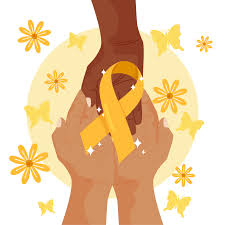

In [14]:
from IPython.display import Image
Image('/workspaces/suicidio/Banco imagenes/suici.jpg')

## Objetivo del Proyecto ##
Desarrollar un modelo de análisis predictivo basado en aprendizaje automático que permita predecir el grupo de edad de las víctimas de suicidio en Colombia, a partir de variables socio-demográficas como el sexo, estado civil, escolaridad, ciclo vital y causa probable del suicidio, con el fin de identificar patrones relevantes que puedan apoyar estrategias de prevención diferenciadas según la etapa de la vida.



## Problema elegido:

Predecir el grupo de edad de una víctima de suicidio en Colombia con base en factores personales y sociales como estado civil, escolaridad, sexo, razón del suicidio, entre otros.

## Justificación:

El análisis por rangos de edad nos permite detectar qué características están más relacionadas con el suicidio en diferentes etapas de la vida.

## Exploración y Preparación de Datos

## Fuente de datos

Datos oficiales del Instituto Nacional de Medicina Legal y Ciencias Forenses: Suicidios en Colombia entre 2015 y 2023.

## Variable objetivo:

Grupo de edad de la víctima

## Variables predictoras candidatas:
- Sexo de la víctima
- Estado civil
- Escolaridad
- Ciclo vital
- Razón del suicidio
- Año del hecho

### Paso 1: Importar librerías

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Paso 2: Cargar el conjunto de datos

In [3]:

df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
df.head()

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
0,1,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Mujer,Soltero(a),Colombia,Educación inicial y educación preescolar,Grupos étnicos,Enero,...,66572,Pueblo Rico,Risaralda,66,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Indigena
1,2,2015,b) Mayores de Edad (>18 años),(18 a 28) Juventud,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,81001,Arauca,Arauca,81,Vivienda,Parte rural (vereda y campo),Generadores de asfixia,Trauma de cuello,Conflicto con pareja o ex pareja,Mestizo
2,3,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Unión libre,Colombia,Educación inicial y educación preescolar,Campesinos (as) y/o trabajadores (as) del campo,Enero,...,81220,Cravo Norte,Arauca,81,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Conflicto con pareja o ex pareja,Mestizo
3,4,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación inicial y educación preescolar,Ninguno,Enero,...,63470,Montenegro,Quindío,63,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
4,5,2015,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación media o secundaria alta,Ninguno,Enero,...,63130,Calarca,Quindío,63,Zonas de Actividades Agropecuarias,Parte rural (vereda y campo),Tóxico,Politraumatismo,Sin información,Mestizo


### Paso 3: Revisar estructura del dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23544 entries, 0 to 23543
Data columns (total 21 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   ID                                    23544 non-null  int64 
 1   Año del hecho                         23544 non-null  int64 
 2   Grupo Mayor Menor de Edad             23544 non-null  object
 3   Ciclo Vital                           23544 non-null  object
 4   Sexo                                  23544 non-null  object
 5   Estado Civil                          23544 non-null  object
 6   País de Nacimiento                    23544 non-null  object
 7   Escolaridad                           23544 non-null  object
 8   Pertenencia Grupal                    23544 non-null  object
 9   Mes                                   23544 non-null  object
 10  Dia                                   23544 non-null  object
 11  Código Dane Municipio       

### Paso 4: Descripción estadística general

In [5]:
df.describe(include='all')

,ID,Año del hecho,Grupo Mayor Menor de Edad,Ciclo Vital,Sexo,Estado Civil,País de Nacimiento,Escolaridad,Pertenencia Grupal,Mes,...,Código Dane Municipio,Municipio,Departamento,Código,Escenario,Zona,Mecanismo Causal,Diagnostico Topográfico de la Lesión,Razón del Suicidio,Ancestro Racial
count,23544.000000,23544.000000,23544,23544,23544,23544,23544,23544,23544,23544,...,23544.000000,23544,23544,23544.000000,23544,23544,23544,23544,23544,23544
unique,NaN,NaN,2,6,2,7,34,12,27,13,...,NaN,978,34,NaN,51,4,14,12,21,8
top,NaN,NaN,b) Mayores de Edad (>18 años),(29 a 59) Adultez,Hombre,Soltero(a),Colombia,Educación básica primaria,Ninguno,Mayo,...,NaN,"Bogotá, D.C.",Antioquia,NaN,Vivienda,Cabecera municipal,Generadores de asfixia,Trauma de cuello,Sin información,Mestizo
freq,NaN,NaN,21041,10258,18928,11115,22973,6291,17026,2076,...,NaN,3373,3913,NaN,17380,17466,15410,14471,12444,19524
mean,11772.500000,2019.271577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,34914.394113,NaN,NaN,34.811629,NaN,NaN,NaN,NaN,NaN,NaN
std,6796.711705,2.574016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,27684.056279,NaN,NaN,29.716454,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,999.000000,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,5886.750000,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11001.000000,NaN,NaN,11.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,11772.500000,2019.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23182.000000,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,17658.250000,2022.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66001.000000,NaN,NaN,66.000000,NaN,NaN,NaN,NaN,NaN,NaN


## Visualización exploratoria
A continuación veremos algunas formas básicas de visualizar nuestros datos.

### Gráfico 1: Distribución por Género

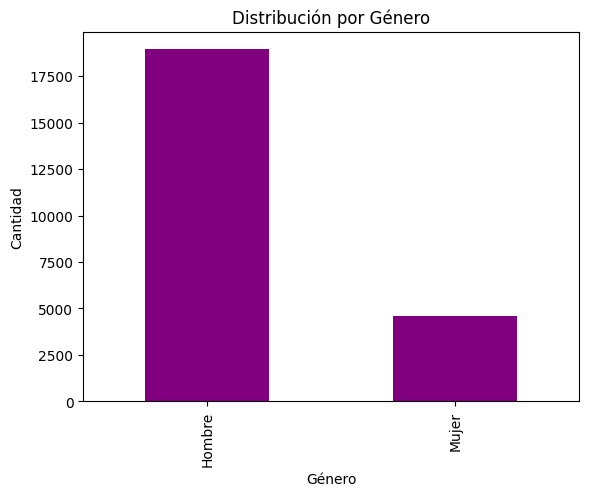

In [11]:
df['sexo'].value_counts().plot(kind='bar', color='purple')
plt.title('Distribución por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.show()

*Este gráfico muestra los grupos de edad más afectados. Se espera observar mayor frecuencia entre jóvenes adultos y adultos medios (ej. 20–39 años).*

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de clases, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 2: Histograma de edades

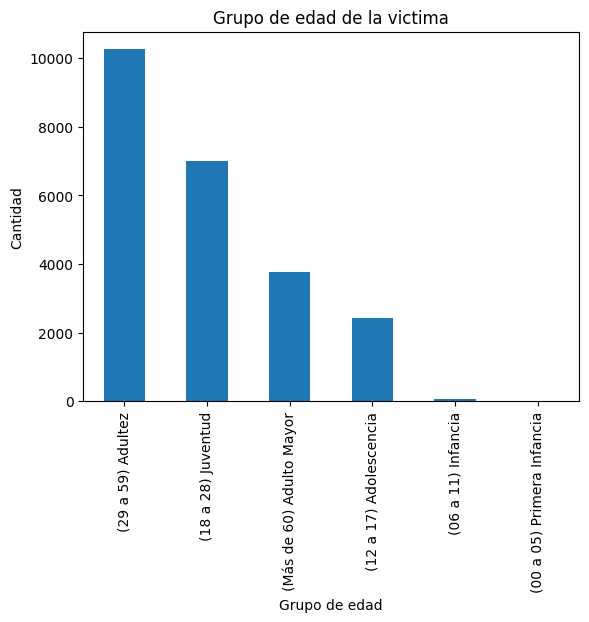

In [15]:
df['Ciclo Vital'].value_counts().plot(kind='bar')
plt.title('Grupo de edad de la victima')
plt.xlabel('Grupo de edad')
plt.ylabel('Cantidad')
plt.show()


*Detectar en qué grupos de edad el modelo acierta más y en cuáles confunde más.*

Es esencial visualizar la variable objetivo del modelo. Nos ayuda a entender si hay desequilibrio de edades, lo cual impacta en la calidad del modelo predictivo.

### Gráfico 3: Barras apiladas por estado civil

In [ ]:
df['Estado Civil'] = df['Estado Civil'].astype(str)
df['Grupo de edad de la victima'] = df['Grupo de edad de la victima'].astype(str)

In [ ]:
df = df.dropna(subset=['Estado Civil', 'Grupo de edad de la victima'])


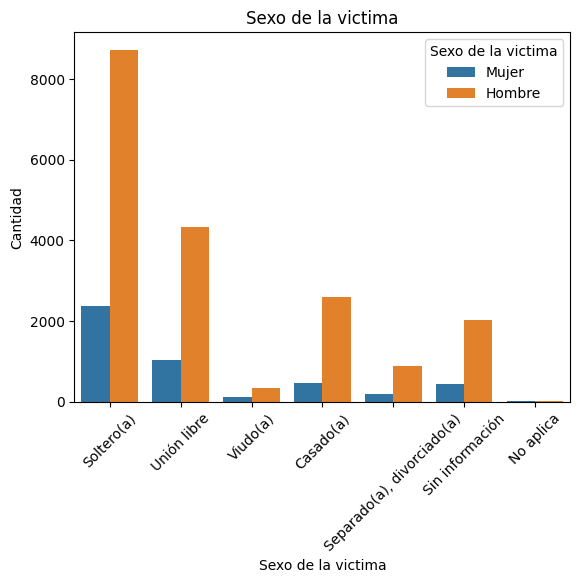

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Estado Civil', hue='Sexo de la victima')
plt.title('Sexo de la victima')
plt.xlabel('Sexo de la victima')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


Ver qué estados civiles son más frecuentes en cada grupo de edad. Por ejemplo, soltería en hombres y en mujeres, seguido por union libre.


Ayuda a identificar cómo se relaciona una variable explicativa clave (Estado Civil) con el target. Además, puede guiar interpretaciones sociales y políticas.

# 🧩 Estudio de caso:  Rango de Edad de Suicidios en Colombia

## 📘 Contexto general


El suicidio constituye una de las expresiones más dolorosas de la crisis en salud mental que enfrentamos como sociedad, y lamentablemente, Colombia no es la excepción. De acuerdo con datos del Instituto Nacional de Medicina Legal y Ciencias Forenses, en los últimos años se ha evidenciado un preocupante incremento en los casos de presuntos suicidios, afectando principalmente a personas jóvenes y adultas. Esta realidad, más allá de las cifras,  nos confronta como comunidad y nos llama a profundizar en la comprensión de sus causas para actuar con responsabilidad y empatía.

Un elemento fundamental para avanzar en esta comprensión es el análisis de la edad de las personas afectadas. Conocer los grupos de edad más vulnerables nos permite identificar patrones, visibilizar riesgos y, sobre todo, enfocar los esfuerzos de prevención hacia quienes más los necesitan. En este sentido, contar con herramientas que nos ayuden a predecir el grupo de edad más propenso a verse afectado por esta problemática podría marcar una diferencia significativa en la forma en que se diseñan e implementan políticas públicas, estrategias educativas y campañas de salud mental.

Este estudio de caso surge precisamente desde esa convicción: la de aportar, desde el análisis de datos y la ciencia, una mirada útil y aplicada al fenómeno del suicidio en Colombia. A través del uso de datos históricos proporcionados por fuentes oficiales, y mediante la aplicación de técnicas de análisis exploratorio y aprendizaje automático, se busca construir un modelo que permita anticipar el rango de edad más vulnerable ante este tipo de desenlaces.

La metodología empleada se sostiene en principios éticos sólidos, considerando el carácter sensible de la información y el respeto hacia las personas detrás de cada registro. Nuestra intención es que los hallazgos de este estudio puedan contribuir, de manera concreta, a fortalecer las acciones de prevención, orientar decisiones informadas y, en última instancia, salvar vidas.


## 📊 Descripción del dataset 

El archivo `Presuntos_Suicidios._Colombia.csv` contiene las siguientes variables:


| Variable                               | Tipo       | Descripción                             |
| -------------------------------------- | ---------- | --------------------------------------- |
| `ID`                                   | Entero     | Identificador único                     |
| `Año del hecho`                        | Numérica   | Año en que ocurrió el evento            |
| `Grupo Mayor Menor de Edad`            | Categórica | Clasifica si es mayor o menor de edad   |
| `Ciclo Vital`                          | Categórica | Etapa de vida (Juventud, Adultez, etc.) |
| `Sexo`                                 | Categórica | Hombre / Mujer                          |
| `Estado Civil`                         | Categórica | Soltero, Unión libre, etc.              |
| `País de Nacimiento`                   | Categórica | País de origen                          |
| `Escolaridad`                          | Ordinal    | Nivel educativo alcanzado               |
| `Pertenencia Grupal`                   | Categórica | Grupos étnicos u otros                  |
| `Mes`                                  | Categórica | Mes del hecho                           |
| `Dia`                                  | Numérica   | Día del hecho                           |
| `Código Dane Municipio`                | Categórica | Código del municipio                    |
| `Municipio`                            | Categórica | Nombre del municipio                    |
| `Departamento`                         | Categórica | Departamento de Colombia                |
| `Código`                               | Categórica | Código del departamento                 |
| `Escenario`                            | Categórica | Lugar del hecho (Vivienda, etc.)        |
| `Zona`                                 | Categórica | Cabecera / Rural                        |
| `Mecanismo Causal`                     | Categórica | Método usado                            |
| `Diagnostico Topográfico de la Lesión` | Categórica | Parte del cuerpo afectada               |
| `Razón del Suicidio`                   | Categórica | Motivo mencionado                       |
| `Ancestro Racial`                      | Categórica | Autorreconocimiento étnico              |



## 🎯 Problema a resolver: 


 Identificar si existe un “pico” en los casos por edad usando las siguientes posibles variables


 | Variable             | Tipo       | Observación                                                |
| -------------------- | ---------- | ---------------------------------------------------------- |
| `Sexo`               | Categórica | Codificar Hombre/Mujer                                     |
| `Estado Civil`       | Categórica | Puede indicar etapa de vida                                |
| `Escolaridad`        | Ordinal    | Relacionada con edad                                       |
| `Razón del Suicidio` | Categórica | Algunas razones son más comunes en ciertos rangos          |
| `Zona`               | Categórica | Urbana/rural                                               |
| `Escenario`          | Categórica | Lugar donde ocurrió                                        |
| `Departamento`       | Categórica | Ubicación geográfica                                       |
| `Pertenencia Grupal` | Categórica | Grupos étnicos o campesinos podrían correlacionar con edad |
| `Ancestro Racial`    | Categórica | Puede ser considerada si hay relación cultural             |


## 1. Cargar el dataset y crear variable objetivo

 Antes de entrenar el modelo, se realizaron los siguientes pasos:

- Limpieza de duplicados y columnas irrelevantes.
- Imputación de valores faltantes con la moda (para datos categóricos).
- Codificación de variables categóricas mediante one-hot encoding.
- Eliminación de la variable Ciclo Vital del conjunto de predictores para evitar fuga de información, ya que fue usada en la construcción de la variable objetivo.

In [56]:
import pandas as pd
df_raw = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_edad_counts = df['Ciclo Vital'].value_counts()
mean = grupo_edad_counts.mean()
std = grupo_edad_counts.std()
threshold = mean + 1.5 * std
grupos_con_pico = grupo_edad_counts[grupo_edad_counts > threshold].index.tolist()
df['Pico_Edad'] = df['Ciclo Vital'].apply(lambda x: 1 if x in grupos_con_pico else 0)
print('Grupos con pico de casos:', grupos_con_pico)
df[['Ciclo Vital', 'Pico_Edad']].head()

Grupos con pico de casos: ['(29 a 59) Adultez']


,Ciclo Vital,Pico_Edad
0,(18 a 28) Juventud,0
1,(18 a 28) Juventud,0
2,(29 a 59) Adultez,1
3,(29 a 59) Adultez,1
4,(29 a 59) Adultez,1


In [55]:
import pandas as pd
df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_edad_counts = df["Ciclo Vital"].value_counts()
grupo_con_mas_casos = grupo_edad_counts.idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
print("Grupo con el mayor número de casos:", grupo_con_mas_casos)
df[["Ciclo Vital", "Pico_Edad"]].head()

Grupo con el mayor número de casos: (29 a 59) Adultez


,Ciclo Vital,Pico_Edad
0,(18 a 28) Juventud,0
1,(18 a 28) Juventud,0
2,(29 a 59) Adultez,1
3,(29 a 59) Adultez,1
4,(29 a 59) Adultez,1


## 2. Evaluación del modelo antes de limpiar los datos

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_con_mas_casos = df["Ciclo Vital"].value_counts().idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
columnas_predictoras = ["Sexo", "Estado Civil", "Escolaridad", "Zona"]
df_modelo = df[columnas_predictoras + ["Pico_Edad"]].dropna()
df_modelo_encoded = pd.get_dummies(df_modelo, columns=columnas_predictoras)
X = df_modelo_encoded.drop("Pico_Edad", axis=1)
y = df_modelo_encoded["Pico_Edad"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print(classification_report(y_test, y_pred))

                      

              precision    recall  f1-score   support

           0       0.65      0.76      0.70      2678
           1       0.60      0.47      0.53      2031

    accuracy                           0.64      4709
   macro avg       0.63      0.62      0.62      4709
weighted avg       0.63      0.64      0.63      4709



## 3. Preparación del dataset: limpieza, imputación y codificación

In [59]:
import pandas as pd
from sklearn.impute import SimpleImputer
df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_con_mas_casos = df["Ciclo Vital"].value_counts().idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
columnas_irrelevantes = ["ID", "Código Dane Municipio", "Municipio", "Código", "País de Nacimiento"]
df = df.drop(columns=[col for col in columnas_irrelevantes if col in df.columns], errors='ignore')
df = df.drop_duplicates()
columnas_predictoras = ["Sexo", "Estado Civil", "Escolaridad", "Zona", "Escenario", "Ciclo Vital"]
df_modelo = df[columnas_predictoras + ["Pico_Edad"]]
imputador = SimpleImputer(strategy="most_frequent")
df_imputado = pd.DataFrame(imputador.fit_transform(df_modelo), columns=df_modelo.columns)
df_codificado = pd.get_dummies(df_imputado, columns=columnas_predictoras)
df_codificado.head()



,Pico_Edad,Sexo_Hombre,Sexo_Mujer,Estado Civil_Casado(a),Estado Civil_No aplica,"Estado Civil_Separado(a), divorciado(a)",Estado Civil_Sin información,Estado Civil_Soltero(a),Estado Civil_Unión libre,Estado Civil_Viudo(a),...,Escenario_Zonas de Actividades Agropecuarias,Escenario_Zonas de actividades agropecuarias,Escenario_Áreas Deportivas y/o Recreativas,Escenario_Áreas deportivas y/o recreativas,Ciclo Vital_(00 a 05) Primera Infancia,Ciclo Vital_(06 a 11) Infancia,Ciclo Vital_(12 a 17) Adolescencia,Ciclo Vital_(18 a 28) Juventud,Ciclo Vital_(29 a 59) Adultez,Ciclo Vital_(Más de 60) Adulto Mayor
0,0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,0,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,1,True,False,False,False,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,1,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
4,1,True,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,False,False,True,False


## 4. Evaluación del modelo después de la limpieza

## - Árbol de decisión

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
y = df_codificado["Pico_Edad"].astype(int)
X = df_codificado.drop("Pico_Edad", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(random_state=42)
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2680
           1       1.00      1.00      1.00      2026

    accuracy                           1.00      4706
   macro avg       1.00      1.00      1.00      4706
weighted avg       1.00      1.00      1.00      4706

Matriz de Confusión:

[[2680    0]
 [   0 2026]]


## - Regresión logística

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X = df_codificado.drop("Pico_Edad", axis=1)
y = df_codificado["Pico_Edad"]
y = pd.to_numeric(y, errors="coerce").fillna(0).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))



Reporte de Clasificación:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2680
           1       1.00      1.00      1.00      2026

    accuracy                           1.00      4706
   macro avg       1.00      1.00      1.00      4706
weighted avg       1.00      1.00      1.00      4706

Matriz de Confusión:

[[2680    0]
 [   0 2026]]


In [64]:
columnas_sin_fuga = [col for col in df_codificado.columns if col != "Pico_Edad" and not col.startswith("Ciclo Vital")]
X = df_codificado[columnas_sin_fuga]
y = df_codificado["Pico_Edad"].astype(int)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred))
print("Matriz de Confusión:\n")
print(confusion_matrix(y_test, y_pred))

Reporte de Clasificación:

              precision    recall  f1-score   support

           0       0.71      0.63      0.67      2680
           1       0.57      0.66      0.61      2026

    accuracy                           0.64      4706
   macro avg       0.64      0.64      0.64      4706
weighted avg       0.65      0.64      0.64      4706

Matriz de Confusión:

[[1686  994]
 [ 689 1337]]


🧾 **Matriz de Confusión:**

- 1,337 verdaderos positivos: el modelo identificó correctamente a personas del grupo con “pico”.

- 994 falsos positivos: clasificó incorrectamente como “pico” a personas que no lo eran.

- 689 falsos negativos: no logró detectar a personas que sí pertenecían al grupo “pico”.

El propósito de este modelo nace de la necesidad de entender, con los datos que tenemos, cuándo y en qué etapa de la vida se concentran más casos de suicidio. se propuso identificar patrones que permitan anticipar si una persona podría pertenecer a un grupo de edad con mayor riesgo, utilizando variables socioculturales, demográficas y contextuales disponibles en el dataset. 

La variable objetivo Pico_Edad fue construida con base en el grupo de edad con el mayor número de casos, específicamente el grupo (29 a 59) Adultez. Se asignó 1 a los casos en ese grupo y 0 al resto.



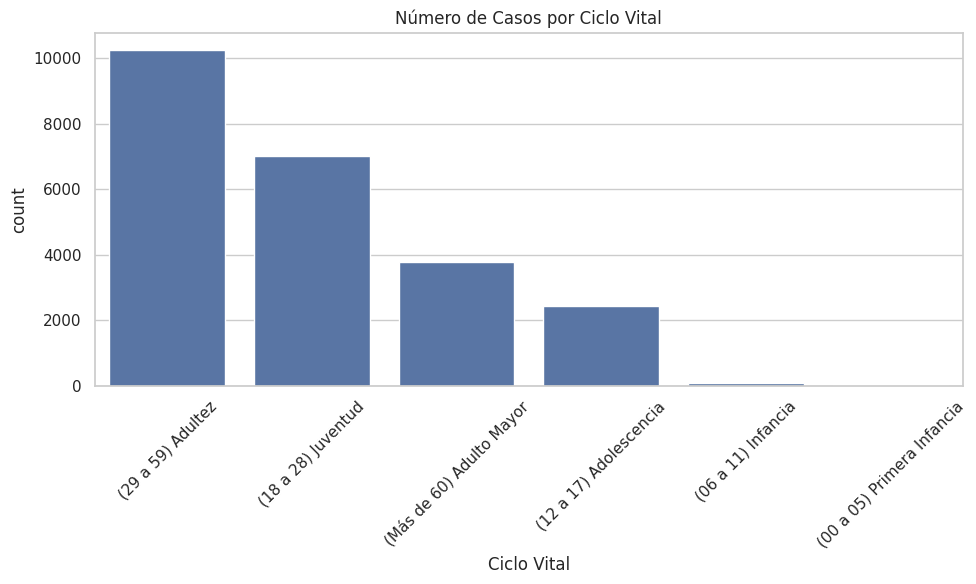

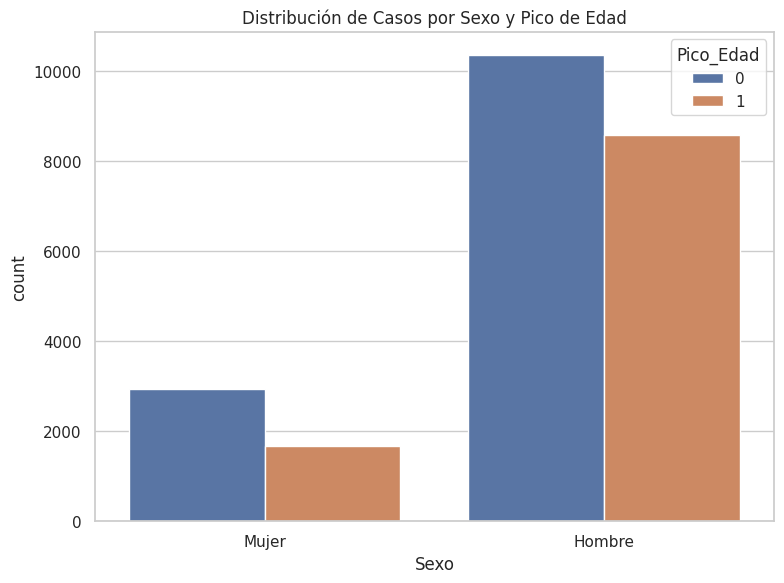

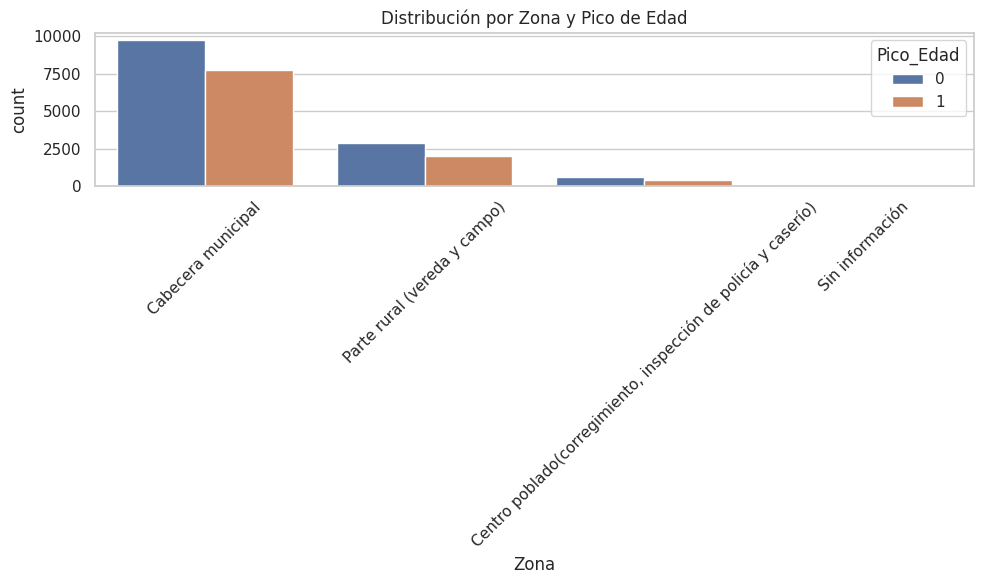

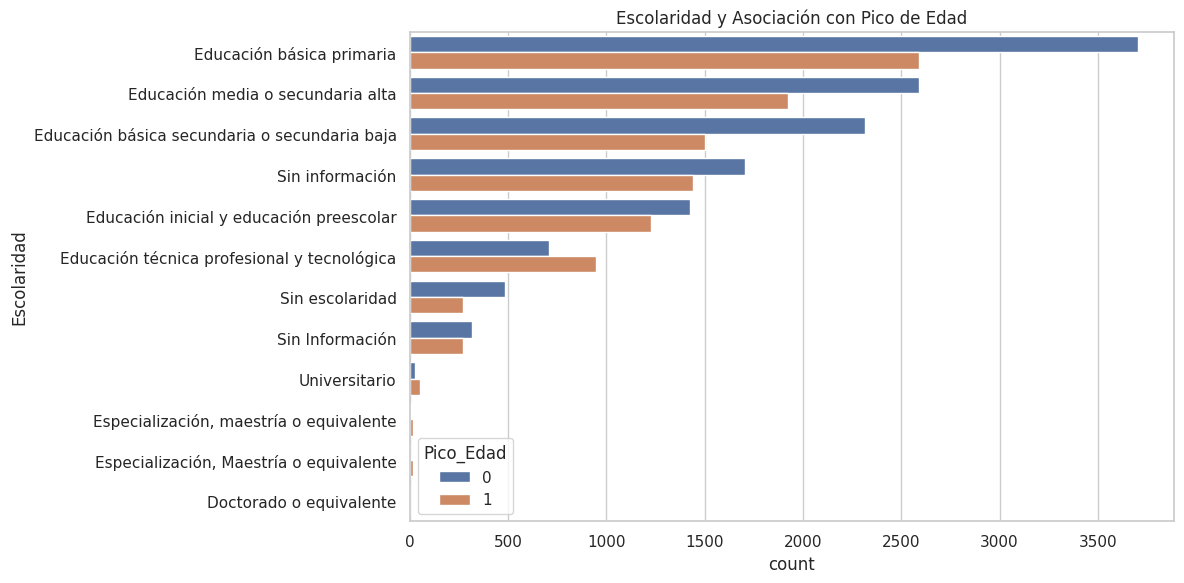

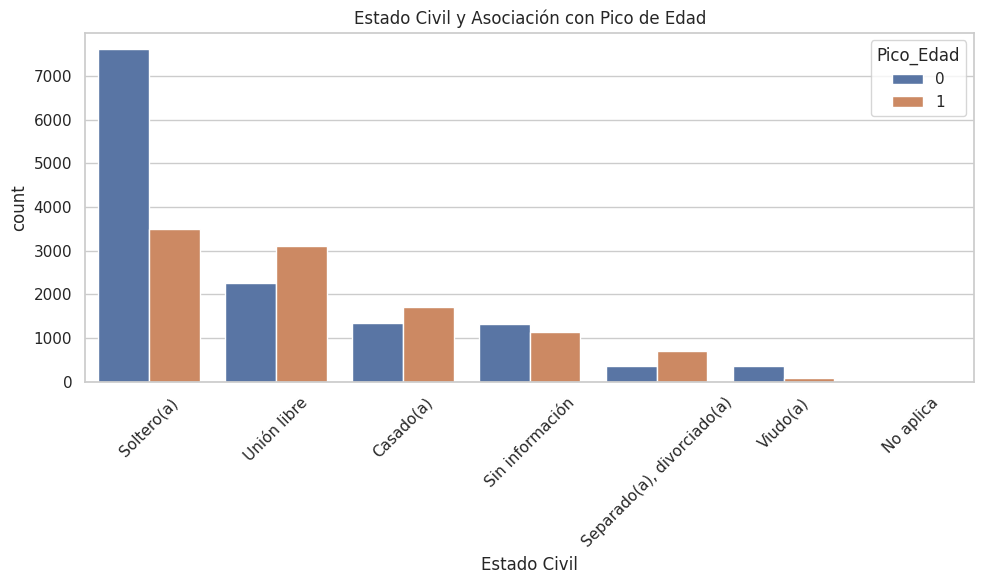

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/workspaces/suicidio/Datos/Presuntos_Suicidios._Colombia.csv', sep=';')
grupo_con_mas_casos = df["Ciclo Vital"].value_counts().idxmax()
df["Pico_Edad"] = df["Ciclo Vital"].apply(lambda x: 1 if x == grupo_con_mas_casos else 0)
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Ciclo Vital", order=df["Ciclo Vital"].value_counts().index)
plt.title("Número de Casos por Ciclo Vital")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Sexo", hue="Pico_Edad")
plt.title("Distribución de Casos por Sexo y Pico de Edad")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Zona", hue="Pico_Edad", order=df["Zona"].value_counts().index)
plt.title("Distribución por Zona y Pico de Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, y="Escolaridad", hue="Pico_Edad", order=df["Escolaridad"].value_counts().index)
plt.title("Escolaridad y Asociación con Pico de Edad")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Estado Civil", hue="Pico_Edad", order=df["Estado Civil"].value_counts().index)
plt.title("Estado Civil y Asociación con Pico de Edad")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()